**Hand Gesture Recognition Project**

In [6]:

# Here we import important libraries

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
import os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Sklearn
from sklearn.model_selection import train_test_split # Helps with organizing data for training
from sklearn.metrics import confusion_matrix # Helps present results as a confusion-matrix

print(tf.__version__)

2.17.1


In [27]:
import torch
# Load YOLOv5 pre-trained model (small, medium, large, or extra-large versions)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-1-23 Python-3.11.11 torch-2.5.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 176MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
# plot images and labels for validation purposes
def validate_9_images(predictions_array, true_label_array, img_array):

  # Array for pretty printing and then figure size
  class_names = ["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"]
  plt.figure(figsize=(15,5))

  for i in range(1, 10):
    # assigning variables
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Plot in a good way
    plt.subplot(3,3,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction

    # Change color of title based on good prediction or not
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
  plt.show()

In [37]:
import torch

# Load YOLOv5 pre-trained model (small, medium, large, or extra-large versions)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-23 Python-3.11.11 torch-2.5.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


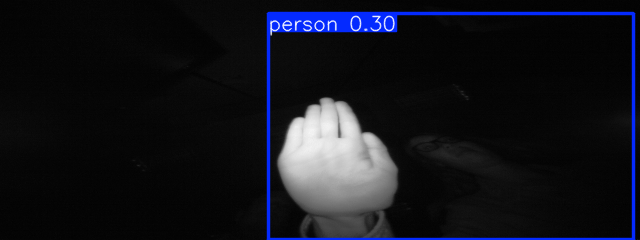

In [35]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load image
img_path = r'/content/frame_00_01_0006.png'  # image path
img = Image.open(img_path)  # Open image using PIL

# Convert image to a NumPy array
img_np = np.array(img)

# Perform inference with YOLOv5
results = model(img_np)  # image Passing into the model

# Display the results
results.show()

In [ ]:
from pathlib import Path
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import torch

# Load YOLOv5 model (example: 'yolov5s' or your custom model path)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# test images directory Path
test_images_path = Path('/content')

# directory for saving results
result_dir = test_images_path / 'results'
result_dir.mkdir(exist_ok=True)

# Process all images in the dataset
for img_path in test_images_path.glob('*.png'):
    # Open the image
    img = Image.open(img_path)

    # Perform inference using the YOLO model
    results = model(img)

    # Convert the image to OpenCV format for rendering
    img_cv = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)

    # Render the results on the image
    for *box, conf, cls in results.xyxy[0]:  # Iterate through detections
        x1, y1, x2, y2 = map(int, box)
        label = f"{model.names[int(cls)]} {conf:.2f}"
        cv2.rectangle(img_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_cv, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Save the annotated image
    annotated_image_path = result_dir / img_path.name
    cv2.imwrite(str(annotated_image_path), cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR))

    # Display the annotated image using matplotlib
    plt.imshow(img_cv)
    plt.axis('off')
    plt.show()

    print(f"Processed {img_path.name}, saved to {annotated_image_path}")

In [12]:
pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 31.9 MB/s eta 0:00:00


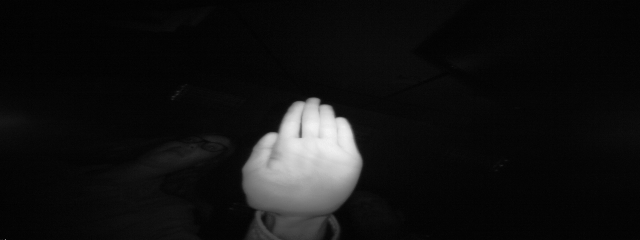

KeyboardInterrupt: Interrupted by user

In [26]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

# Initialize MediaPipe Hands module
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7)

# List of test images
test_images = ["/content/frame_00_01_0006.png"]

# square bounding box around the hand
def draw_square_bounding_box(image, landmarks):
    # Get image dimensions
    height, width, _ = image.shape

    # Initialize bounding box coordinates
    x_min, y_min = width, height
    x_max, y_max = 0, 0

    # Calculate bounding box
    for landmark in landmarks.landmark:
        x, y = int(landmark.x * width), int(landmark.y * height)
        x_min, y_min = min(x_min, x), min(y_min, y)
        x_max, y_max = max(x_max, x), max(y_max, y)

    # Adjust to make it square
    box_width = x_max - x_min
    box_height = y_max - y_min
    box_size = max(box_width, box_height)

    # Center the square box around the original rectangle
    x_min = x_min - (box_size - box_width) // 2
    y_min = y_min - (box_size - box_height) // 2
    x_max = x_min + box_size
    y_max = y_min + box_size

    # box stays within image bounds
    x_min = max(0, x_min)
    y_min = max(0, y_min)
    x_max = min(width, x_max)
    y_max = min(height, y_max)

    # Draw the square bounding box
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

# Process each image
for img_path in test_images:
    # Load the image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error reading {img_path}")
        continue

    # Flip the image for a selfie-view effect
    img = cv2.flip(img, 1)

    # Convert the image to RGB
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detect hands in the image
    results = hands.process(rgb_img)

    # Draw landmarks and bounding boxes
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Draw hand landmarks
            mp_drawing.draw_landmarks(img, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Draw square bounding box
            draw_square_bounding_box(img, hand_landmarks)

    # Display the processed image
    cv2_imshow(img)

    # Pause to view the image
    if input("Press Enter to continue or type 'q' to quit: ").lower() == 'q':
        break

# Release resources
hands.close()


**Where it Comes To The Split The image dataset into Train & Test & Validation**



In [ ]:
import os
import random
import shutil

# dataset Path
dataset_path = r"C:\Users\NAVEENKUMAR\Downloads\data"
images_path = os.path.join(dataset_path, "images")
labels_path = os.path.join(dataset_path, "labels")

# Spliting The Data
output_dirs = {
    "train": r"C:\Users\NAVEENKUMAR\Downloads\data",
    "val": r"C:\Users\NAVEENKUMAR\Downloads\data",
    "test": r"C:\Users\NAVEENKUMAR\Downloads\data",
}

# Create output directories
for split in output_dirs.values():
    os.makedirs(os.path.join(split, "images"), exist_ok=True)
    os.makedirs(os.path.join(split, "labels"), exist_ok=True)

# list of image files
image_files = [f for f in os.listdir(images_path) if f.endswith((".jpg", ".png", ".jpeg"))]

# split dataset
random.seed(42)
random.shuffle(image_files)

train_ratio, val_ratio, test_ratio = 0.7, 0.2, 0.1
train_count = int(len(image_files) * train_ratio)
val_count = int(len(image_files) * val_ratio)

train_files = image_files[:train_count]
val_files = image_files[train_count:train_count + val_count]
test_files = image_files[train_count + val_count:]

# Function to move files
def move_files(file_list, split):
    for file_name in file_list:
        base_name = os.path.splitext(file_name)[0]
        img_src = os.path.join(images_path, file_name)
        label_src = os.path.join(labels_path, f"{base_name}.txt")

        img_dst = os.path.join(output_dirs[split], "images", file_name)
        label_dst = os.path.join(output_dirs[split], "labels", f"{base_name}.txt")

        if os.path.exists(img_src) and os.path.exists(label_src):
            shutil.copy(img_src, img_dst)
            shutil.copy(label_src, label_dst)

# Forword files to respective directories
move_files(train_files, "train")
move_files(val_files, "val")
move_files(test_files, "test")

print("Dataset split completed!")

In [ ]:
import os

directory = r"/content/frame_00_01_0001.png"

if not os.path.exists(directory):
    print(f"Directory does not exist: {directory}")

**CNN-Model Building**

In [3]:
# CNN Model important libraries
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2)

In [ ]:
training_set = train_datagen.flow_from_directory(r"/content/frame_00_01_0001.png",
                                                target_size = (64, 64),
                                                class_mode = "binary")

In [ ]:
training_set.class_indices

In [ ]:
test_set.class_indices

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
classifier = Sequential()

In [ ]:
# Convolution
from keras.layers import Conv2D
classifier.add(Conv2D(input_shape=[64,64,3],
                     filters=32, kernel_size=3,activation='relu')) # Input Layer

In [ ]:
# Max_Pooling
from keras.layers import MaxPooling2D
classifier.add(MaxPooling2D(pool_size=2,strides=2))

In [ ]:
# Flattening
from keras.layers import Flatten
classifier.add(Flatten())  # it Convert 2D Into 1D Output Result

In [ ]:
# Full_Connection
from keras.layers import Dense
classifier.add(Dense(units=128,activation='relu'))  # Hiden Layer
classifier.add(Dense(units=1,activation='sigmoid'))  # Output Layer

In [ ]:
# Evaluation_Model
classifier.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
classifier.fit(x=training_set,validation_data = test_set,epochs=10)

In [ ]:
test_image= Image.open(r"/content/frame_00_01_0006.png")

test_image = test_image.resize((64,64))
test_image = np.array(test_image)
test_image = np.expand_dims(test_image,axis=0)

result = classifier.predict(test_image)
